<a href="https://colab.research.google.com/github/BE-project-2023/CODES/blob/main/InceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!nvidia-smi

Wed Mar 22 11:47:14 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    30W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install --upgrade --no-cache-dir gdown


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!gdown --id 1BZ6D4kkzk2CmdSfrrjfW2U-h-aabhgwx

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1BZ6D4kkzk2CmdSfrrjfW2U-h-aabhgwx
To: /content/data.zip
100% 1.26G/1.26G [00:16<00:00, 76.1MB/s]


In [ ]:
from zipfile import ZipFile

file_name = "/content/data.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')
     

done


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, \
                             accuracy_score)
import cv2

In [ ]:
our_folders = ['Acne and Rosacea Photos', \
              'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', \
              'Melanoma Skin Cancer Nevi and Moles', \
               'Psoriasis pictures Lichen Planus and related diseases', \
               'Eczema Photos', \
               'Tinea Ringworm Candidiasis and other Fungal Infections', \
               'Seborrheic Keratoses and other Benign Tumors', \
              'Nail Fungus and other Nail Disease', \
              'Warts Molluscum and other Viral Infections', \
              'Systemic Disease']

In [ ]:
root_dir = '/content/train'

In [ ]:
test_dir = '/content/test'

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


In [ ]:
acne_train_path = os.path.join(root_dir,'Acne and Rosacea Photos')
actinic_train_path = os.path.join(root_dir, 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions')
melonama_train_path = os.path.join(root_dir, 'Melanoma Skin Cancer Nevi and Moles')
psoriasis_train_path = os.path.join(root_dir,'Psoriasis pictures Lichen Planus and related diseases')
eczema_train_path = os.path.join(root_dir,'Eczema Photos')
tinea_train_path = os.path.join(root_dir,'Tinea Ringworm Candidiasis and other Fungal Infections')
seborrheic_train_path = os.path.join(root_dir,'Seborrheic Keratoses and other Benign Tumors')
nail_train_path = os.path.join(root_dir,'Nail Fungus and other Nail Disease')
warts_train_path = os.path.join(root_dir,'Warts Molluscum and other Viral Infections')
systemic_train_path = os.path.join(root_dir,'Systemic Disease')


In [ ]:
acne_test_path = os.path.join(test_dir,'Acne and Rosacea Photos')
actinic_test_path = os.path.join(test_dir, 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions')
melonama_test_path = os.path.join(test_dir, 'Melanoma Skin Cancer Nevi and Moles')
psoriasis_test_path = os.path.join(test_dir,'Psoriasis pictures Lichen Planus and related diseases')
eczema_test_path = os.path.join(test_dir,'Eczema Photos')
tinea_test_path = os.path.join(test_dir,'Tinea Ringworm Candidiasis and other Fungal Infections')
seborrheic_test_path = os.path.join(test_dir,'Seborrheic Keratoses and other Benign Tumors')
nail_test_path = os.path.join(test_dir,'Nail Fungus and other Nail Disease')
warts_test_path = os.path.join(test_dir,'Warts Molluscum and other Viral Infections')
systemic_test_path = os.path.join(test_dir,'Systemic Disease')


actinic_test_files = ([files_ for _, _, files_ in os.walk(actinic_test_path)])[0]
acne_test_files = ([files_ for _, _, files_ in os.walk(acne_test_path)])[0]
psoriasis_test_files = ([files_ for _, _, files_ in os.walk(psoriasis_test_path)])[0]
melonama_test_files = ([files_ for _, _, files_ in os.walk(melonama_test_path)])[0]
eczema_test_files = ([files_ for _, _, files_ in os.walk(eczema_test_path)])[0]
tinea_test_files = ([files_ for _, _, files_ in os.walk(tinea_test_path)])[0]
seborrheic_test_files = ([files_ for _, _, files_ in os.walk(seborrheic_test_path)])[0]
nail_test_files = ([files_ for _, _, files_ in os.walk(nail_test_path)])[0]
warts_test_files = ([files_ for _, _, files_ in os.walk(warts_test_path)])[0]
systemic_test_files = ([files_ for _, _, files_ in os.walk(systemic_test_path)])[0]

In [ ]:

train_dirs = []
for i in our_folders:
    for folder_,_, files_ in os.walk(f'/content/train{i}'):
        print(folder_)
        train_dirs.append(folder_)

In [ ]:
actinic_train_files = ([files_ for _, _, files_ in os.walk(actinic_train_path)])[0]
acne_train_files = ([files_ for _, _, files_ in os.walk(acne_train_path)])[0]
melonama_train_files = ([files_ for _, _, files_ in os.walk(melonama_train_path)])[0]
psoriasis_train_files = ([files_ for _, _, files_ in os.walk(psoriasis_train_path)])[0]
eczema_train_files = ([files_ for _, _, files_ in os.walk(eczema_train_path)])[0]
nail_train_files = ([files_ for _, _, files_ in os.walk(nail_train_path)])[0]
seborrheic_train_files = ([files_ for _, _, files_ in os.walk(seborrheic_train_path)])[0]
tinea_train_files = ([files_ for _, _, files_ in os.walk(tinea_train_path)])[0]
warts_train_files = ([files_ for _, _, files_ in os.walk(warts_train_path)])[0]
systemic_train_files = ([files_ for _, _, files_ in os.walk(systemic_train_path)])[0]

In [ ]:
def plotGridImages(d_name, list_files, train_path,nrows= 1, ncols=5):
    # for folder_name in our_folders:
    fig = plt.figure(1, figsize=(30, 30))
    grid = ImageGrid(fig, 111, nrows_ncols=(nrows, ncols), axes_pad=0.05)
    print(f"{d_name}")
    for i, img_id in enumerate(random.sample(list_files,ncols)):
        ax = grid[i]
        image_dir_path = os.path.join(train_path, img_id)
        img = image.load_img(image_dir_path, (224, 224))
        img = image.img_to_array(img)
        ax.imshow(img / 255.)
        ax.text(10, 200, 'LABEL: %s' % d_name, color='k', backgroundcolor='w',\
        alpha=0.8)
        ax.axis('off')
    # plt.tight_layout()
    plt.show()

Melonama


/usr/local/lib/python3.9/dist-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


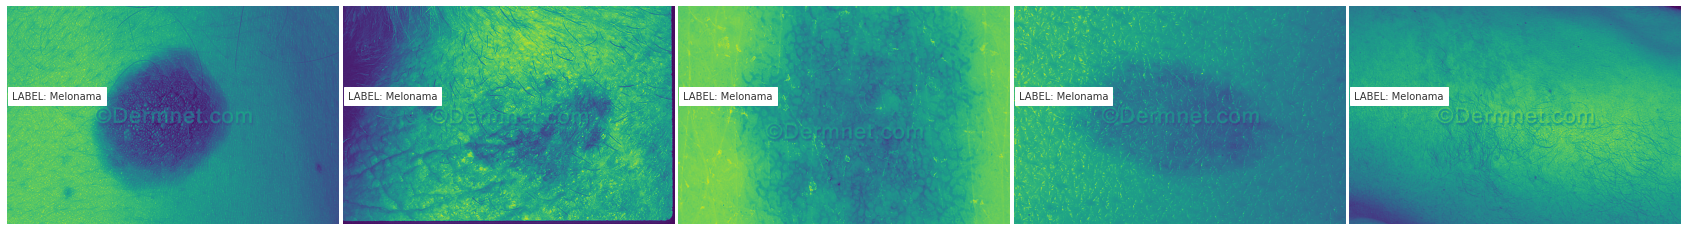

In [ ]:
plotGridImages('Melonama',melonama_train_files, melonama_train_path,ncols=5)

In [ ]:
final_df = pd.DataFrame()

In [ ]:
melonama_df = pd.DataFrame()
melonama_df['Image'] = [melonama_train_path+'/'+img for img in melonama_train_files]
melonama_df['Label'] = "melonama"
melonama_df.shape

(463, 2)

In [ ]:
actinic_df = pd.DataFrame()
actinic_df['Image'] =  [actinic_train_path+'/'+img for img in actinic_train_files]
actinic_df['Label'] = "actinic"
actinic_df.shape

(1149, 2)

In [ ]:
acne_df = pd.DataFrame()
acne_df['Image'] =  [acne_train_path+'/'+img for img in acne_train_files]
acne_df['Label'] = "acne"
acne_df.shape


(840, 2)

In [ ]:
nail_df = pd.DataFrame()
nail_df['Image'] =  [nail_train_path+'/'+img for img in nail_train_files]
nail_df['Label'] = "nail"
nail_df.shape


(1040, 2)

In [ ]:
psoriasis_df = pd.DataFrame()
psoriasis_df['Image'] =  [psoriasis_train_path+'/'+img for img in psoriasis_train_files]
psoriasis_df['Label'] = "psoriasis"
psoriasis_df.shape

(1405, 2)

In [ ]:
eczema_df = pd.DataFrame()
eczema_df['Image'] =  [eczema_train_path+'/'+img for img in eczema_train_files]
eczema_df['Label'] = "eczema"
eczema_df.shape


(1235, 2)

In [ ]:
seborrheic_df = pd.DataFrame()
seborrheic_df['Image'] =  [seborrheic_train_path+'/'+img for img in seborrheic_train_files]
seborrheic_df['Label'] = "seborrheic"
seborrheic_df.shape

(1371, 2)

In [ ]:
tinea_df = pd.DataFrame()
tinea_df['Image'] =  [tinea_train_path+'/'+img for img in tinea_train_files]
tinea_df['Label'] = "tinea"
tinea_df.shape


(1300, 2)

In [ ]:
warts_df = pd.DataFrame()
warts_df['Image'] =  [warts_train_path+'/'+img for img in warts_train_files]
warts_df['Label'] = "warts"
warts_df.shape

(1086, 2)

In [ ]:
systemic_df = pd.DataFrame()
systemic_df['Image'] =  [systemic_train_path+'/'+img for img in systemic_train_files]
systemic_df['Label'] = "systemic"
systemic_df.shape

(606, 2)

In [ ]:
final_df = final_df.append([actinic_df, melonama_df, acne_df, nail_df, warts_df, seborrheic_df, psoriasis_df, tinea_df, eczema_df, systemic_df])

<ipython-input-27-396ac0b4f462>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append([actinic_df, melonama_df, acne_df, nail_df, warts_df, seborrheic_df, psoriasis_df, tinea_df, eczema_df, systemic_df])


In [ ]:
final_df.shape

(10495, 2)

In [ ]:
final_test_df = pd.DataFrame()
################# melonama #########

melonama_test_df = pd.DataFrame()
melonama_test_df['Image'] = [melonama_test_path+'/'+img for img in melonama_test_files]
melonama_test_df['Label'] = "melonama"

##################  actinic  ##########

actinic_test_df = pd.DataFrame()
actinic_test_df['Image'] =  [actinic_test_path+'/'+img for img in actinic_test_files]
actinic_test_df['Label'] = "actinic"

################  acne  ##########

acne_test_df = pd.DataFrame()
acne_test_df['Image'] =  [acne_test_path+'/'+img for img in acne_test_files]
acne_test_df['Label'] = "acne"
###########################################
###########################################
nail_df = pd.DataFrame()
nail_df['Image'] =  [nail_train_path+'/'+img for img in nail_train_files]
nail_df['Label'] = "nail"
psoriasis_df = pd.DataFrame()
psoriasis_df['Image'] =  [psoriasis_train_path+'/'+img for img in psoriasis_train_files]
psoriasis_df['Label'] = "psoriasis"
eczema_df = pd.DataFrame()
eczema_df['Image'] =  [eczema_train_path+'/'+img for img in eczema_train_files]
eczema_df['Label'] = "eczema"
seborrheic_df = pd.DataFrame()
seborrheic_df['Image'] =  [seborrheic_train_path+'/'+img for img in seborrheic_train_files]
seborrheic_df['Label'] = "seborrheic"
tinea_df = pd.DataFrame()
tinea_df['Image'] =  [tinea_train_path+'/'+img for img in tinea_train_files]
tinea_df['Label'] = "tinea"
warts_df = pd.DataFrame()
warts_df['Image'] =  [warts_train_path+'/'+img for img in warts_train_files]
warts_df['Label'] = "warts"
systemic_df = pd.DataFrame()
systemic_df['Image'] =  [systemic_train_path+'/'+img for img in systemic_train_files]
systemic_df['Label'] = "systemic"
final_test_df = final_test_df.append([actinic_df, melonama_df, acne_df, nail_df, warts_df, seborrheic_df, psoriasis_df, tinea_df, eczema_df, systemic_df])

final_test_df.shape

<ipython-input-29-f07b72ccd5e0>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_test_df = final_test_df.append([actinic_df, melonama_df, acne_df, nail_df, warts_df, seborrheic_df, psoriasis_df, tinea_df, eczema_df, systemic_df])


(10495, 2)

In [ ]:
train_data_gen  = ImageDataGenerator(
                                    rescale=1 / 255.0,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    validation_split=0.2,
                                    fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1 / 255.0)

In [ ]:
batch_size = 8
train_generator = train_data_gen.flow_from_dataframe(
    dataframe=final_df,
    x_col="Image",
    y_col="Label",
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode="categorical",#sparse
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_data_gen.flow_from_dataframe(
    dataframe=final_df,
    x_col="Image",
    y_col="Label",
    target_size=(256,256),
    batch_size=batch_size,
    class_mode="categorical", #sparse
    subset='validation',
    shuffle=True,
    seed=42 
)
test_generator = test_data_gen.flow_from_dataframe(
    dataframe=final_test_df,
    x_col="Image",
    y_col="Label",
    target_size=(256,256),
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
)

Found 8396 validated image filenames belonging to 10 classes.
Found 2099 validated image filenames belonging to 10 classes.
Found 10495 validated image filenames belonging to 10 classes.


In [ ]:
from keras.applications.inception_v3 import InceptionV3

res = InceptionV3(weights ='imagenet', include_top = False, 
               input_shape = (256, 256, 3)) 
               
# Setting the trainable to false
res.trainable = False


x= res.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
# x = Dropout(0.5)(x) 
x = Dense(512, activation ='relu')(x)
x = BatchNormalization()(x)
# x = Dropout(0.5)(x)

x = Dense(256, activation ='relu')(x)
x = BatchNormalization()(x)

x = Dense(10, activation ='softmax')(x)
model = Model(res.input, x)

model.compile(optimizer =tf.keras.optimizers.RMSprop(learning_rate=0.0001),  #'Adam'
              loss ="categorical_crossentropy",  #sparse_categorical_crossentropy
              metrics =["categorical_accuracy"])  #sparse_categorical_accuracy

model.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                  

In [ ]:
history = model.fit(train_generator, 
                    epochs=50, 
                    validation_data=valid_generator,
                   )

Epoch 1/50
1050/1050 [==============================] - 244s 218ms/step - loss: 2.1195 - categorical_accuracy: 0.3349 - val_loss: 3.5088 - val_categorical_accuracy: 0.0710
Epoch 2/50
1050/1050 [==============================] - 227s 216ms/step - loss: 1.7809 - categorical_accuracy: 0.4017 - val_loss: 3.8471 - val_categorical_accuracy: 0.0691
Epoch 3/50
1050/1050 [==============================] - 224s 213ms/step - loss: 1.6503 - categorical_accuracy: 0.4356 - val_loss: 3.9587 - val_categorical_accuracy: 0.0896
Epoch 4/50
1050/1050 [==============================] - 226s 215ms/step - loss: 1.5788 - categorical_accuracy: 0.4505 - val_loss: 4.3493 - val_categorical_accuracy: 0.0600
Epoch 5/50
1050/1050 [==============================] - 225s 215ms/step - loss: 1.5389 - categorical_accuracy: 0.4614 - val_loss: 4.6988 - val_categorical_accuracy: 0.0743
Epoch 6/50
1050/1050 [==============================] - 224s 214ms/step - loss: 1.4796 - categorical_accuracy: 0.4665 - val_loss: 5.1549 - v

In [ ]:
result = model.evaluate(test_generator,batch_size=32)
print("test_loss, test accuracy",result)

10495/10495 [==============================] - 217s 21ms/step - loss: 2.8354 - categorical_accuracy: 0.5505
test_loss, test accuracy [2.835395097732544, 0.5504525899887085]


In [ ]:
xp_preds = model.predict(test_generator)
xp_pred_classes = np.argmax(xp_preds, axis=1)

10495/10495 [==============================] - 184s 17ms/step


In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())


xp_acc = accuracy_score(true_classes, xp_pred_classes)
print("Xception Model Accuracy: {:.2f}%".format(xp_acc * 100))

Xception Model Accuracy: 55.05%
